In [2]:
!git clone https://github.com/SeventhSERGIO/datasets.git

fatal: destination path 'datasets' already exists and is not an empty directory.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

In [4]:
# Técnicas de reducción de dimensionalidad
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import LocallyLinearEmbedding

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
codon_file_names = ['bact_codon.csv', 'invr_codon.csv', 'prim_codon.csv', 'virus_codon.csv']

# Crea un DataFrame de todos los tipos de codon
# Nombres: bact, invr, prim, viru
codon_dfs = {}
for name in codon_file_names:
    codon_dfs[name[:4]] = pd.read_csv(f'/content/datasets/uso_de_codones/{name}', sep = '\t', header=None)
    label = name.split("_")[0]
    codon_dfs[name[:4]]['y'] = pd.Series([label] * codon_dfs[name[:4]].shape[0])

all_codons = pd.concat(codon_dfs.values())

In [46]:
X = all_codons[all_codons.columns[:-1]]
y = all_codons['y']

# Reducción de dimensionalidad

In [44]:
def process_reduction(X, y, name, ax):
    clases = np.unique(y)
    # Define diferentes marcadores para cada clase
    markers=['o','v','^','<','>','8','s','P','*','X']#[:len(clases)]

    # Grafica cada clase con un marcador diferente
    for i, clase in enumerate(clases):
        ax.scatter(*X[y==clase].T, label=clase, marker=markers[i], alpha=0.7, s=20)

    # Añade leyenda fuera del gráfico
    ax.legend()

    # Ajusta los límites del gráfico para ser un poco más amplios que el mínimo y máximo de las características transformadas
    # ax.set_xlim(min(X[:,0]) - 0.5, max(X[:,0]) + 0.5)
    # ax.set_ylim(min(X[:,1]) - 0.5, max(X[:,1]) + 0.5)

    ax.set_title(f'Espacio reducido por {name}')
    return ax


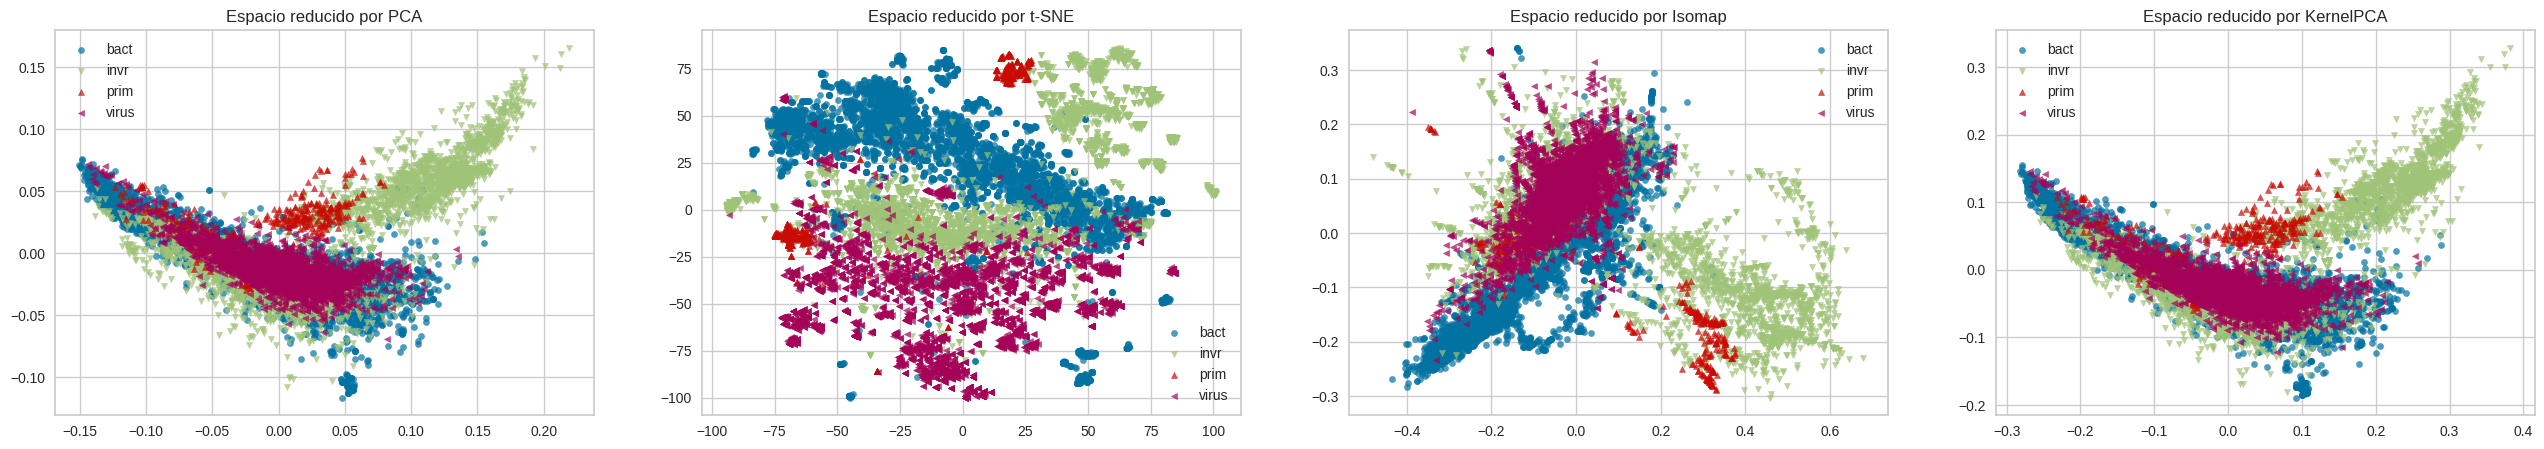

In [47]:
fig,axs = plt.subplots(1,4)
n_components = 2
# PCA | t-SNE | Isomap | KernelPCA | LLE | MDS
tecnicas = ['PCA', 't-SNE', 'Isomap', 'KernelPCA']
X_fits ={}

for tec, ax, name in zip([PCA, TSNE, Isomap, KernelPCA], axs.flatten(), tecnicas):
    if name == 'KernelPCA':
        X_fits[name] = tec(n_components = 2, kernel = 'rbf', gamma = 2).fit_transform(X)
    else:
        X_fits[name] = tec(n_components = n_components).fit_transform(X)
    ax = process_reduction(X_fits[name], y, name, ax)
fig.set_size_inches(8*4, 5)

# K-means

## Gráficas de codo

In [33]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

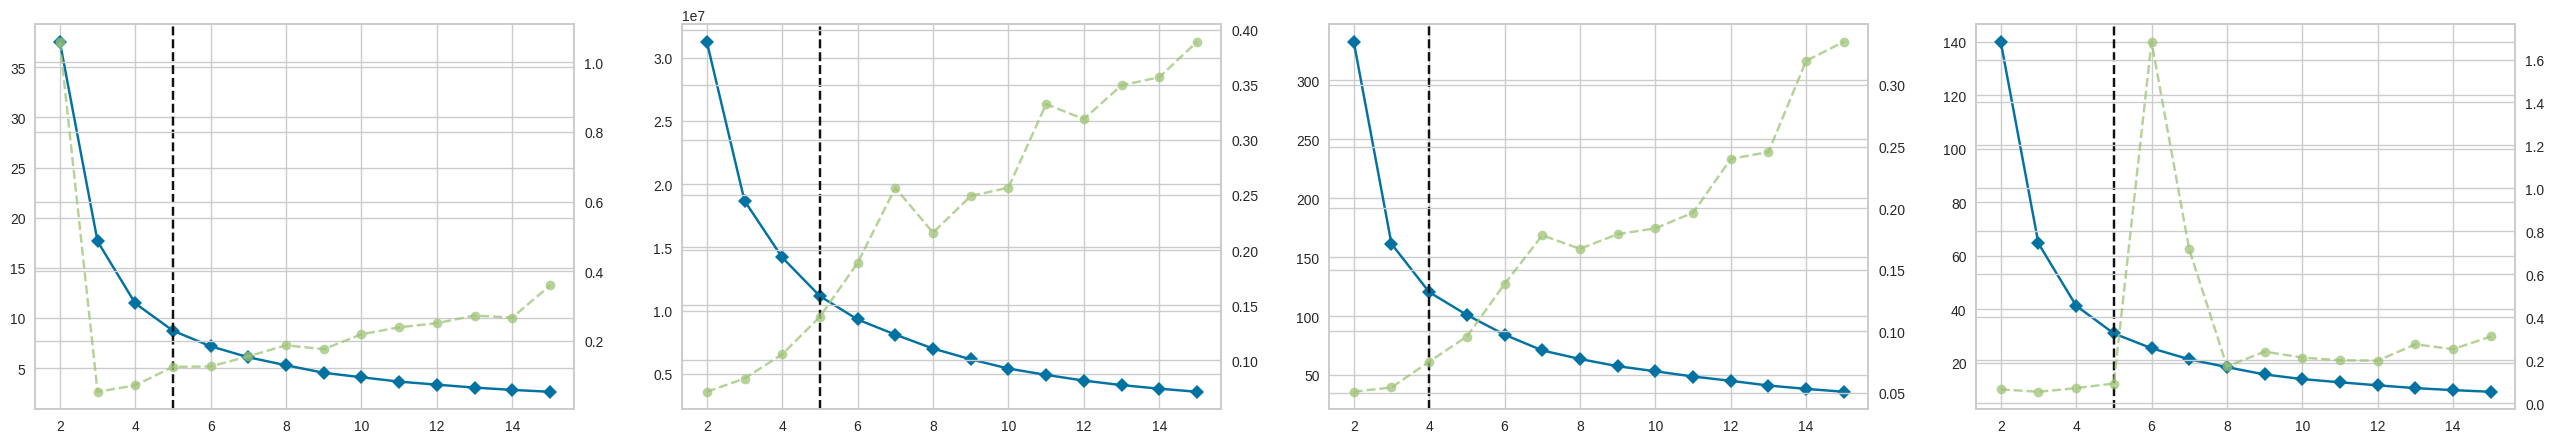

In [39]:
fig2,axs2 = plt.subplots(1,4)

# PCA | t-SNE | Isomap | KernelPCA
tecnicas = ['PCA', 't-SNE', 'Isomap', 'KernelPCA']
for i,X in enumerate(X_fits.items()):
    vis = KElbowVisualizer(KMeans(), k = 15, timings = True, ax=axs2[i])
    vis.fit(X[1])
    ax.set_xlabel('Número de grupos')
    ax.set_ylabel('Distorsión')
    ax.set_title(f'{X[0]}')
fig2.set_size_inches(8*4, 5)

Se escoge el número de clústeres según lo marcado en la visualización de codo para cada técnica de reducción de dimensionalidad.

# Agrupaciones

In [40]:
def plot_kmeadias(X, n_clusters, ax):
    km = KMeans(n_clusters = n_clusters)
    # Ajuste
    km = km.fit(X)
    # Etiquetas de clase
    y = km.predict(X)
    # Centroides
    C = km.cluster_centers_
    target_kmedias = y

    # plot de las 2 primeras características
    ax.scatter(X[:,0], X[:,1], c = y, cmap = 'rainbow')
    ax.scatter(C[:,0], C[:,1], marker = '*', s = 200, c = 'k')

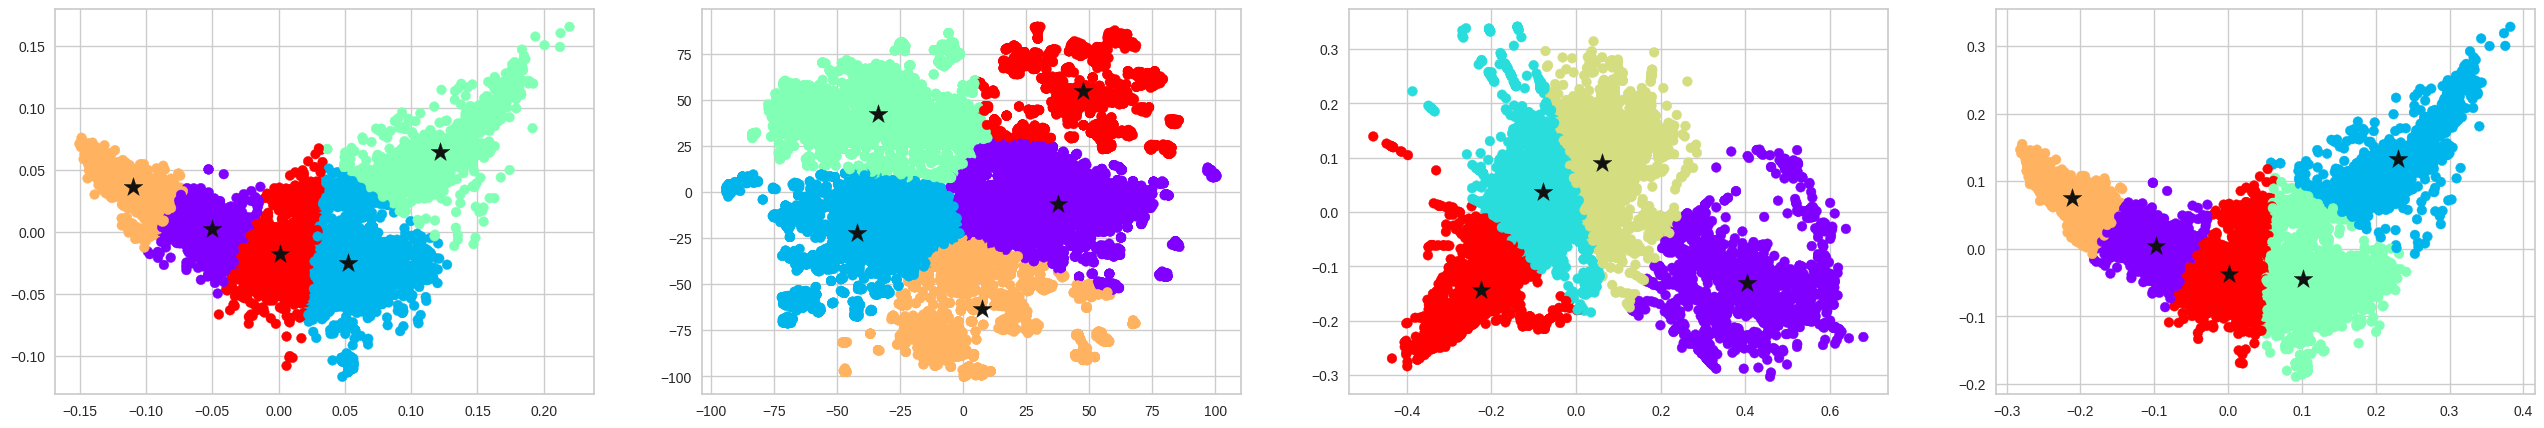

In [43]:
fig3,axs3 = plt.subplots(1,4)

# PCA | t-SNE | Isomap | KernelPCA
tecnicas = ['PCA', 't-SNE', 'Isomap', 'KernelPCA']
n_clusters = [5, 5, 4, 5]
for i,X in enumerate(X_fits.items()):
    name = X[0]
    data = X[1]
    plot_kmeadias(data, n_clusters[i], axs3[i])
    ax.set_title(f'{name}')
fig3.set_size_inches(8*4, 5)

Debido a que el K-means categoriza por distancia, el reductor de dimensionalidad debería garantizar de que los clusteres ya se encuentren separados a una distancia apropiada entre ellos, tal que el algoritmo de K-means sólo reconozca los clústeres. Sin embargo, en ninguno se logra una separación total.